In [12]:
'''
helper functions:
'''

def show(cmdstr):
    print(cmdstr, '=', eval(cmdstr))
    
def newline(row=1):
    print('\n' * (row-1))
    
def markline(length=15, mark='-'):
    print(f"\n{mark * length}")

In [13]:
'''
讀取 BOM 開頭的 utf-8 檔案:
with open(fname, "r", encoding='utf-8-sig') as fp:
    pass
'''
import pandas as pd

fname = "112_student.csv"

with open(fname, "r", encoding='utf-8-sig') as fp:
    data = fp.read()
    
lines = data.strip().split('\n')


In [14]:
import pandas as pd
import requests

url = "https://stats.moe.gov.tw/files/detail/112/112_student.csv"
df = pd.read_csv(url)
data = df[ (df['學校名稱']=='國立臺北科技大學') & (df['日間∕進修別']=='D 日') & (df['等級別']=='B 四技')]

# html = requests.get(url)
# lines = html.text.split('\n')
# lines[0]

data.columns

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1000)>

In [15]:
stu = list(data.values[0][8:8+8])
stu = [stu[k:k+2] for k in range(0, 8, 2)]
show('stu')

index = ["一年級", "二年級", "三年級", "四年級",]
columns = ["男生數", "女生數"]
df2 = pd.DataFrame(stu, index=index, columns=columns)

df2.plot(kind='line')
df2.plot(kind='line', subplots=True)
# df2.plot(kind='bar')
# df2.plot(kind='pie', subplots=True)
plt.legend(loc='upper right')  # 作用在最後一個。

AttributeError: 'str' object has no attribute 'values'

In [ ]:
stus = [[1079, 499], [1035, 485], [1077, 438], [1072, 416]]
index = ["一年級", "二年級", "三年級", "四年級",]
columns = ["男生數", "女生數"]

stus = pd.DataFrame(stus, index=index, columns=columns)

In [ ]:
'''
顯示內容類:
介紹中文顯示的設定
title='Taipei Tech'
xlabel='年級'
ylabel='人數'

顯示功能類:
stacked=True
plt.xticks(rotation=0) # 跟 x 座標刻度有關。
subplots=True  # 分開列印。

縮圖位置的設定:
plt.legend(loc='best')
==================   =============
Location String      Location Code
==================   =============
'best' (Axes only)   0
'upper right'        1
'upper left'         2
'lower left'         3
'lower right'        4
'right'              5
'center left'        6
'center right'       7
'lower center'       8
'upper center'       9
'center'             10
==================   =============
'''

# import matplotlib.pyplot as plt
# from matplotlib.font_manager import fontManager

import pandas as pd

import matplotlib
from matplotlib.font_manager import fontManager

import matplotlib.pyplot as plt

# *** Pandas繪圖時的中文顯示的設定
#''' Method 1:
# import matplotlib
# from matplotlib.font_manager import fontManager

# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')
#'''

''' Method 2:
# import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = "DFKai-SB"  # "DFKai-SB" 標楷體  # "Microsoft JhengHei" 微軟正黑體
plt.rcParams["axes.unicode_minus"] = False
#'''
#---------------------------------------------------------------------------------------------------

g1 = stus.plot(kind='line', title='國立臺北科技大學', figsize=[3, 3])
# g1 = stus.plot(kind='line', title='Taipei Tech', figsize=[3, 3])
# g1 = stus.plot(kind='barh', title='Taipei Tech', figsize=[3, 3])
# g1 = stus.plot(kind='pie', title='Taipei Tech', subplots=True, figsize=[3, 3])
# g1 = stus.plot(kind='bar', title='Taipei Tech', xlabel='年級', ylabel='人數', figsize=[3, 3])
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.show()

g1 = stus.plot(kind='bar', title='Taipei Tech', xlabel='年級', ylabel='人數', stacked=True, figsize=[3, 3])
# plt.legend(loc='best')
# plt.xticks(rotation=0)
# plt.show()

# help(plt.legend)    

       城市  大專院校數目
0  30 臺北市     120
1  01 新北市     110
2  19 臺中市      60
3  03 桃園市      56
4  50 高雄市      41
5  21 臺南市      15


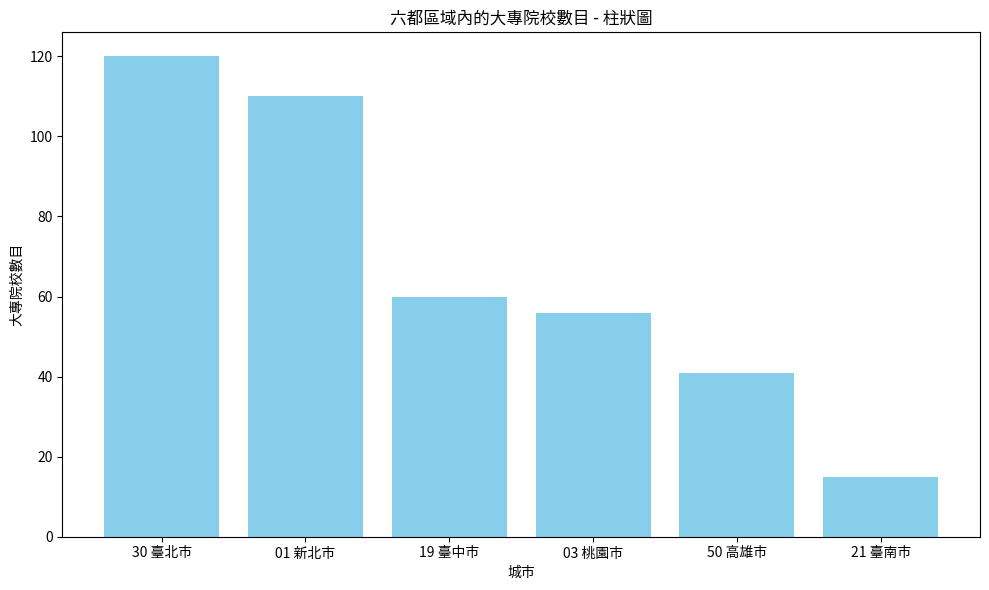

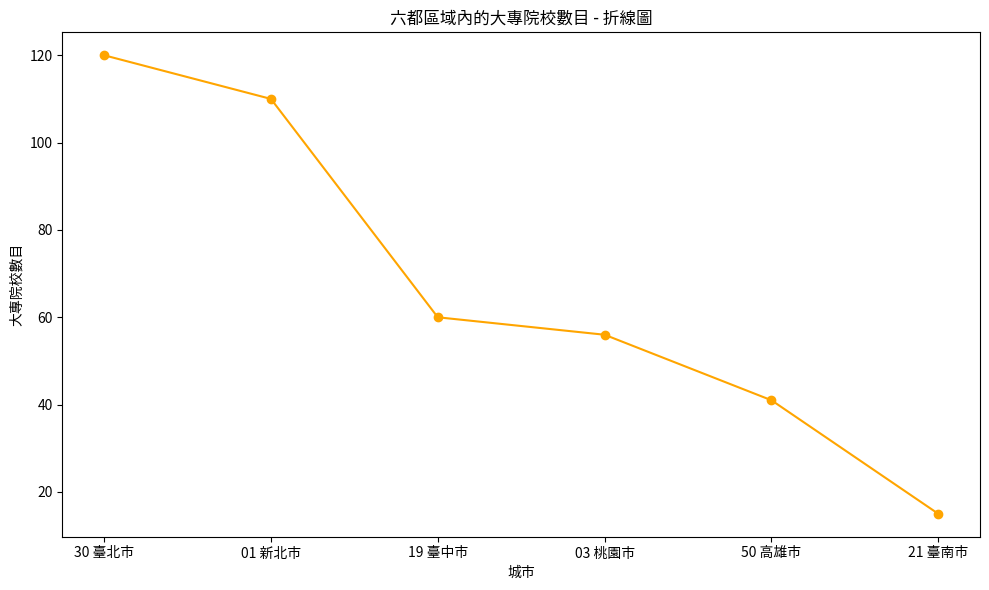

In [23]:
import pandas as pd
import csv
import requests
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 加入中文字型設定：翰字鑄造-台北黑體
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

def download_csv(url, filename):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we got a valid response

    with open(filename, 'w', encoding='utf-8') as f:
        f.write(response.text)

# Usage
#download_csv('https://stats.moe.gov.tw/files/detail/112/112_student.csv', '112_student.csv')



# 讀取CSV檔案
df = pd.read_csv('112_student.csv')

# 篩選六都城市名稱
cities = ['01 新北市', '30 臺北市', '03 桃園市', '19 臺中市', '21 臺南市', '50 高雄市']
df_six_cities = df[df['縣市名稱'].isin(cities)]
#print(df_six_cities)

# 計算每個城市的大專院校數目
college_counts = df_six_cities['縣市名稱'].value_counts()

# 轉換為DataFrame
college_counts_df = college_counts.reset_index()
college_counts_df.columns = ['城市', '大專院校數目']
print(college_counts_df)

# 繪製柱狀圖
plt.figure(figsize=(10, 6))
plt.bar(college_counts_df['城市'], college_counts_df['大專院校數目'], color='skyblue')
plt.title('六都區域內的大專院校數目 - 柱狀圖')
plt.xlabel('城市')
plt.ylabel('大專院校數目')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(college_counts_df['城市'], college_counts_df['大專院校數目'], marker='o', color='orange')
plt.title('六都區域內的大專院校數目 - 折線圖')
plt.xlabel('城市')
plt.ylabel('大專院校數目')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



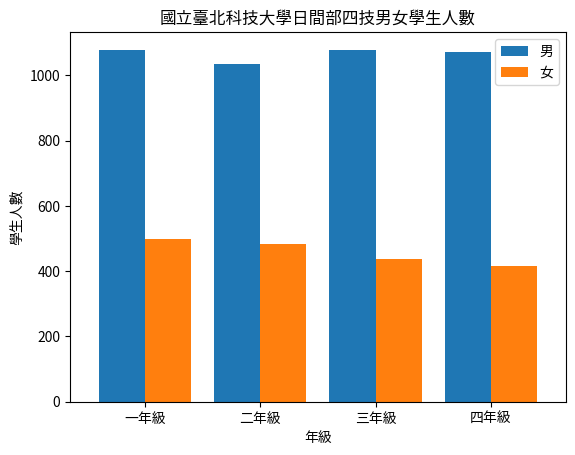

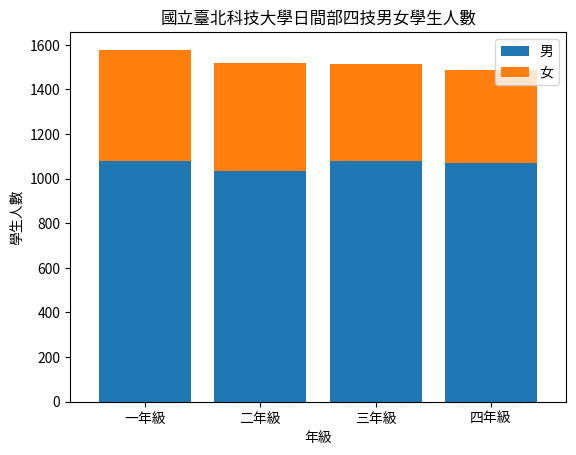

In [26]:
#q2
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
data = pd.read_csv('112_student.csv')

# 篩選出國立臺北科技大學日間大學部四技的資料
taipei_tech = data[data['學校名稱'].str.contains('國立臺北科技大學') & data['日間∕進修別'].str.contains('D 日') & data['等級別'].str.contains('B 四技')]

# 提取男女學生人數
students = taipei_tech[['一年級男', '二年級男', '三年級男', '四年級男', '一年級女', '二年級女', '三年級女', '四年級女']]

# 計算每個年級的男女學生總數
students_sum = students.sum()

# 分別建立男女學生的DataFrame
male_students = students_sum[['一年級男', '二年級男', '三年級男', '四年級男']]
female_students = students_sum[['一年級女', '二年級女', '三年級女', '四年級女']]

# 建立一個新的DataFrame，用於繪圖
df = pd.DataFrame({
    '男': [students_sum['一年級男'], students_sum['二年級男'], students_sum['三年級男'], students_sum['四年級男']],
    '女': [students_sum['一年級女'], students_sum['二年級女'], students_sum['三年級女'], students_sum['四年級女']]
}, index=['一年級', '二年級', '三年級', '四年級'])

# 繪製併排柱狀圖
ax = df.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], width=0.8)
ax.set_title('國立臺北科技大學日間部四技男女學生人數')
ax.set_xlabel('年級')
ax.set_ylabel('學生人數')
plt.xticks(rotation=0)
plt.show()

# 繪製堆疊柱狀圖
ax = df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)
ax.set_title('國立臺北科技大學日間部四技男女學生人數')
ax.set_xlabel('年級')
ax.set_ylabel('學生人數')
plt.xticks(rotation=0)
plt.show()


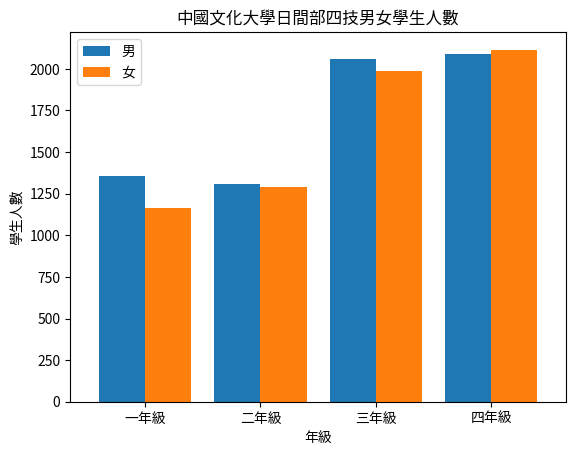

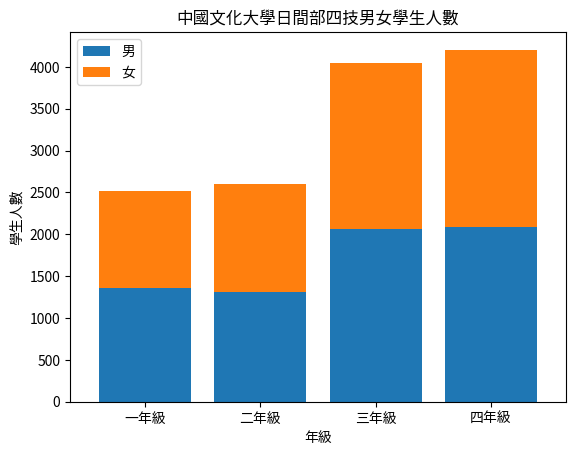

In [27]:
#q3
import pandas as pd
import matplotlib.pyplot as plt

# 讀取CSV檔案
data = pd.read_csv('112_student.csv')

# 篩選出中國文化大學日間大學部四技的資料
taipei_tech = data[data['學校名稱'].str.contains('中國文化大學') & data['日間∕進修別'].str.contains('D 日') & data['等級別'].str.contains('B 學士')]

# 提取男女學生人數
students = taipei_tech[['一年級男', '二年級男', '三年級男', '四年級男', '一年級女', '二年級女', '三年級女', '四年級女']]

# 計算每個年級的男女學生總數
students_sum = students.sum()

# 分別建立男女學生的DataFrame
male_students = students_sum[['一年級男', '二年級男', '三年級男', '四年級男']]
female_students = students_sum[['一年級女', '二年級女', '三年級女', '四年級女']]

# 建立一個新的DataFrame，用於繪圖
df = pd.DataFrame({
    '男': [students_sum['一年級男'], students_sum['二年級男'], students_sum['三年級男'], students_sum['四年級男']],
    '女': [students_sum['一年級女'], students_sum['二年級女'], students_sum['三年級女'], students_sum['四年級女']]
}, index=['一年級', '二年級', '三年級', '四年級'])

# 繪製併排柱狀圖
ax = df.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], width=0.8)
ax.set_title('中國文化大學日間部四技男女學生人數')
ax.set_xlabel('年級')
ax.set_ylabel('學生人數')
plt.xticks(rotation=0)
plt.show()

# 繪製堆疊柱狀圖
ax = df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], width=0.8)
ax.set_title('中國文化大學日間部四技男女學生人數')
ax.set_xlabel('年級')
ax.set_ylabel('學生人數')
plt.xticks(rotation=0)
plt.show()
